In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
import requests
from io import StringIO
%matplotlib inline

plt.style.use('bmh')

In [2]:
#read the data
tractor_sales = pd.read_csv('D:/IMS Proschool/Business Analytics/Time series/Case Studies - Questions with Solutions-20190724/Case 1/Tractor-Sales.csv')

In [3]:
tractor_sales.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [4]:
tractor_sales.tail()

,Month-Year,Number of Tractor Sold
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519
143,Dec-14,605


In [5]:
tractor_sales.describe(include='all')

,Month-Year,Number of Tractor Sold
count,144,144.000000
unique,144,NaN
top,Feb-08,NaN
freq,1,NaN
mean,NaN,389.694444
std,NaN,171.500016
min,NaN,138.000000
25%,NaN,248.500000
50%,NaN,369.000000
75%,NaN,509.250000


In [6]:
# separate month and year
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(tractor_sales))
import calendar
tractor_sales['Month'] = dates.month
tractor_sales['Month'] = tractor_sales['Month'].apply(lambda x : calendar.month_abbr[x])
tractor_sales['Year'] = dates.year

In [7]:
tractor_sales.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [8]:
#drop Month-Year column as it is not needed now
tractor_sales.drop(['Month-Year'], axis=1, inplace=True)
#rename Number of Tractor Sold column
tractor_sales.rename(columns={'Number of Tractor Sold':'Tractor Sales'}, inplace=True)
#reorder the columns
tractor_sales = tractor_sales[['Month','Year','Tractor Sales']]

In [9]:
tractor_sales.head()

,Month,Year,Tractor Sales
0,Jan,2003,141
1,Feb,2003,157
2,Mar,2003,185
3,Apr,2003,199
4,May,2003,203


In [10]:
#set index as dates to use it as a time series data
tractor_sales.set_index(dates, inplace=True)

In [11]:
tractor_sales.head()

,Month,Year,Tractor Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [12]:
#extract the time series
sales = tractor_sales['Tractor Sales']

In [13]:
sales.head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Tractor Sales, dtype: int64

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


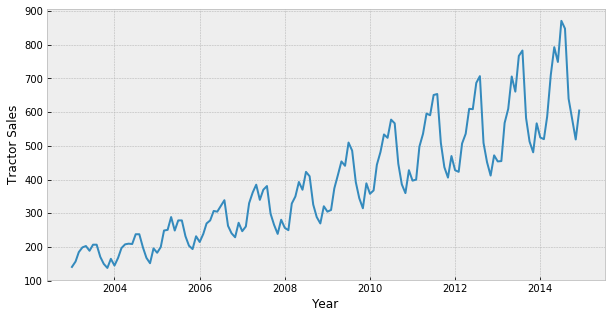

In [14]:
#plot the time series
plt.figure(figsize=(10,5))
plt.plot(sales)
plt.xlabel('Year')
plt.ylabel('Tractor Sales')
plt.show()

In [15]:
#determine rolling statistics
rollmean = sales.rolling(window=12).mean()
rollstd = sales.rolling(window=12).std()

In [16]:
rollmean

2003-01-01           NaN
2003-02-01           NaN
2003-03-01           NaN
2003-04-01           NaN
2003-05-01           NaN
2003-06-01           NaN
2003-07-01           NaN
2003-08-01           NaN
2003-09-01           NaN
2003-10-01           NaN
2003-11-01           NaN
2003-12-01    176.000000
2004-01-01    176.333333
2004-02-01    177.250000
2004-03-01    178.250000
2004-04-01    179.000000
2004-05-01    179.583333
2004-06-01    181.250000
2004-07-01    183.833333
2004-08-01    186.416667
2004-09-01    188.750000
2004-10-01    190.250000
2004-11-01    191.416667
2004-12-01    194.000000
2005-01-01    197.166667
2005-02-01    199.833333
2005-03-01    204.166667
2005-04-01    207.750000
2005-05-01    214.333333
2005-06-01    217.666667
                 ...    
2012-07-01    523.000000
2012-08-01    527.416667
2012-09-01    527.416667
2012-10-01    528.666667
2012-11-01    529.166667
2012-12-01    529.333333
2013-01-01    531.500000
2013-02-01    534.166667
2013-03-01    539.250000


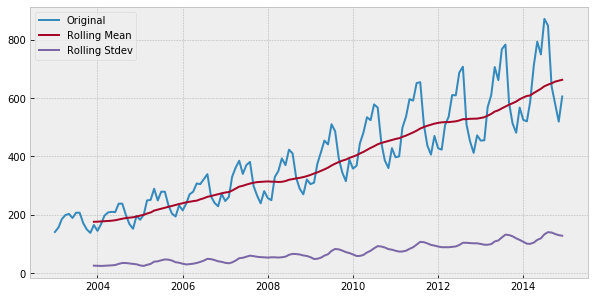

In [17]:
#plot the rolling statistics
plt.figure(figsize=(10,5))
plt.plot(sales, label='Original')
plt.plot(rollmean, label='Rolling Mean')
plt.plot(rollstd, label='Rolling Stdev')
plt.legend(loc='best')
plt.show()

In [18]:
#pivot table for monthly sales
monthly_sales = pd.pivot_table(tractor_sales, values='Tractor Sales', columns='Year', index='Month')
monthly_sales

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


In [19]:
#re-index
monthly_sales = monthly_sales.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
monthly_sales

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


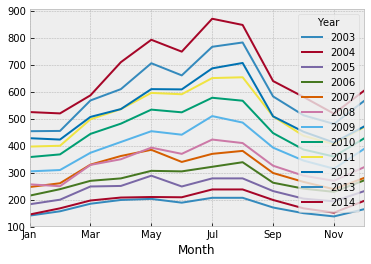

In [20]:
#plot
#plt.figure(figsize=(10,5))
#plt.plot(monthly_sales)
#plt.legend()
monthly_sales.plot()
plt.show()

In [21]:
#pivot table for yearly sales
yearly_sales = pd.pivot_table(tractor_sales, values='Tractor Sales', columns='Month', index='Year')
yearly_sales

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299
2008,350,410,321,250,257,423,370,329,393,270,289,326
2009,414,486,389,310,305,510,441,374,454,315,345,393
2010,482,567,428,368,358,578,524,444,534,360,386,447
2011,536,654,470,400,397,651,591,498,596,406,437,509


In [22]:
yearly_sales = yearly_sales[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

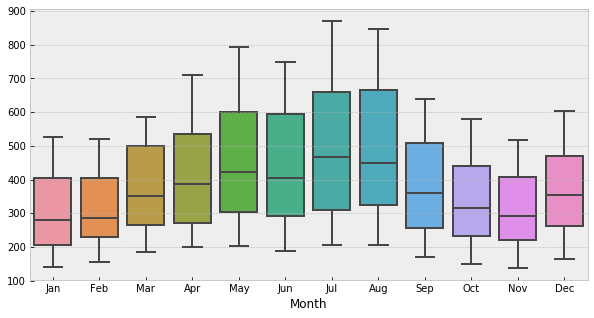

In [24]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.boxplot(data=yearly_sales)
plt.show()

#### The tractor sales have increased every year
#### July and August have the highest sales
#### Seasonal cycle of 12 months is seen, where mean of each month starts with an increasing trend in the beginning of the year and drops down towards the end of the year

In [25]:
#decompose the components
decomposition = sm.tsa.seasonal_decompose(sales, model='multiplicative')

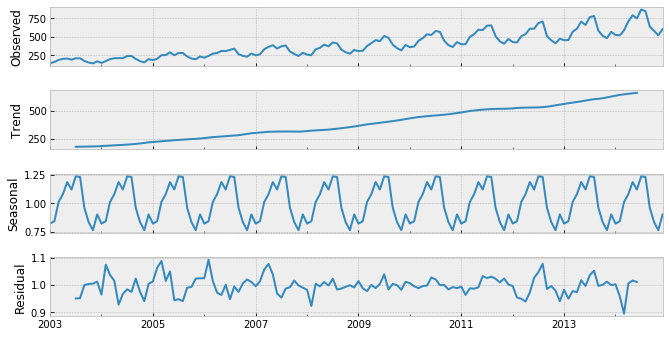

In [26]:
fig = decomposition.plot()
fig.set_figwidth(10)
fig.set_figheight(5)
plt.show()

### Define p,d,q

In [27]:
#define q,d to take values between 0 and 1
d = q = range(0,2)
#define p to take values between 0 and 3
p = range(0,4)
#generate different combinations of p,d,q triplets
pdq = list(itertools.product(p,d,q))
#generate different combinations of seasonal p,d,q triplets
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [28]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1),
 (2, 0, 0),
 (2, 0, 1),
 (2, 1, 0),
 (2, 1, 1),
 (3, 0, 0),
 (3, 0, 1),
 (3, 1, 0),
 (3, 1, 1)]

In [29]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (3, 0, 0, 12),
 (3, 0, 1, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12)]

In [37]:
#specify to ignore warning messages
warnings.filterwarnings("ignore")

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sales,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [38]:
print('Smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

Smallest AIC is 799.906428266948 for model SARIMAX(3, 1, 0)x(3, 1, 1, 12)


In [39]:
#fit this model
mod = sm.tsa.statespace.SARIMAX(sales, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()

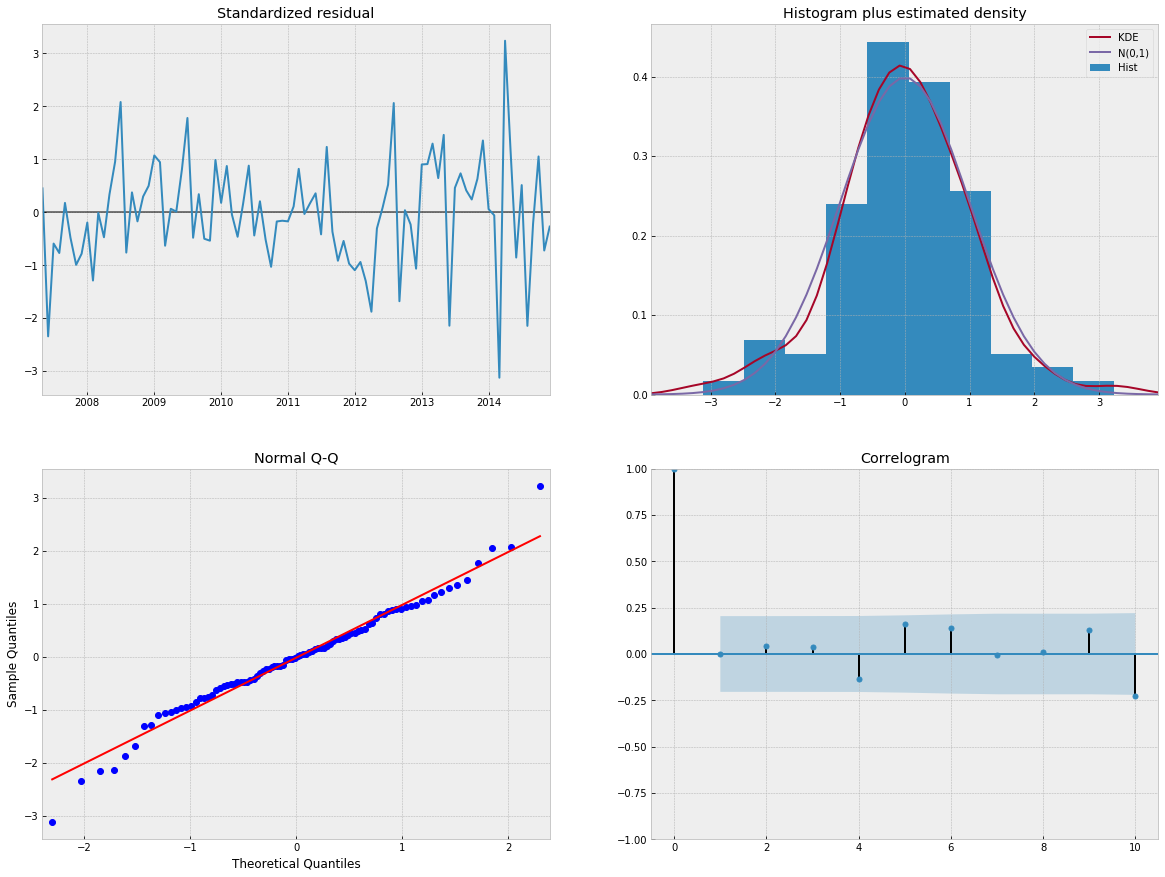

In [40]:
results.plot_diagnostics(figsize=(20,15))
plt.show()

In [41]:
pred1 = results.get_prediction(start='2003-01-01', dynamic=True)
pred1_ci = pred1.conf_int()

In [44]:
pred1_ci

,lower Tractor Sales,upper Tractor Sales
2003-01-01,-3394.757202,3394.757202
2003-02-01,-4421.014017,4421.014017
2003-03-01,-5324.067256,5324.067256
2003-04-01,-6154.300200,6154.300200
2003-05-01,-6895.450434,6895.450434
2003-06-01,-7573.634745,7573.634745
2003-07-01,-8200.514253,8200.514253
2003-08-01,-8784.295221,8784.295221
2003-09-01,-9332.619260,9332.619260
2003-10-01,-9850.915657,9850.915657


In [45]:
pred2 = results.get_forecast('2015-01-01')
pred2_ci = pred2.conf_int()

In [46]:
pred2_ci

,lower Tractor Sales,upper Tractor Sales
2015-01-01,536.386685,598.741636


In [49]:
#In this case the model is used to predict data that the model was built on
#1-step ahead forecasting implies that each forecasted point is used to predict the following one
pred0 = results.get_prediction(start='2003-01-01', dynamic=False)
pred0_ci = pred0.conf_int()

#In sample prediction with dynamic forecasting of last year again the model is used to predict data that the model was built on
pred1 = results.get_prediction(start='2003-01-01', dynamic=True)
pred1_ci = pred1.conf_int()

#"True" forecasting of out of sample data. In this case the model is asked to predict data it has not seen before.
pred2 = results.get_forecast('2016-01-01')
# Give the end year till you want forecast
pred2_ci = pred2.conf_int()

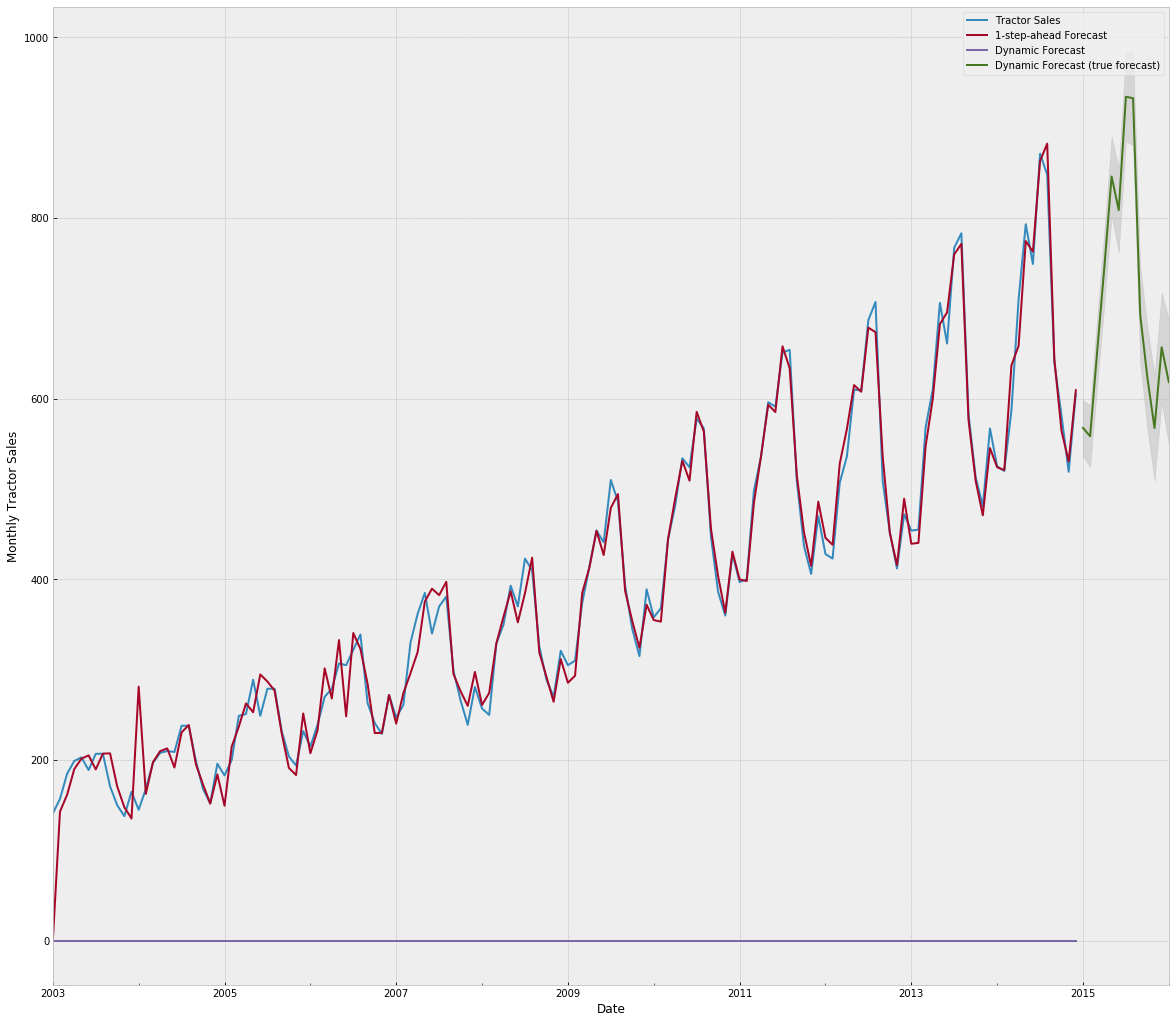

In [52]:
#plot the predicted values
ax = sales.plot(figsize=(20, 18))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (true forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly Tractor Sales')
plt.xlabel('Date')
plt.legend()
plt.show()